## Answer the question

### Why do we need machine learning methods instead of creating a complicated formula?

Sometimes it is very difficult to find a complicated formula to matching data when they are in high dimensions or in strange distribution, but 
using machine learning we can get a model with not bad matching effect easily in usual.

### Wha't's the disadvantages of the 1st Random Choosen methods in our course?

According to the large number theorem, a large number of samples distribution obey the Gaussian distribution, which means it possible to 
find suitable parameters by random choosen.But we need to try more when the parameters' numbers increase.The complexity is about O(K^n).
K is constant while n is the parameters' numbers.When the K and n is large enough we can not find the suitable parameters in short time.


### Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?
Sure that the 2nd method supervised direction is better than 1st one.The second method can not find the best direction to reduce 
the error but choose the last three directions randomly.But only one of them can reduce the error and it is not 
the negative gradient direction.

### Why do we use Derivative / Gredient to fit a target function?
By using gredient we can find the best direction to reduce the target funciton(loss funciton),which is the negative gardient direction.

### In the words 'Gredient Descent', what's the Gredient and what's the Descent?
The gradient is a vector indicating that the directional derivative of a function at that
point obtains the maximun value along that direction, which means that the function changes
the fastest along that direction at that point.

Descent means that we renew the paramaters by using formula(α' = α - ▽f(α))

### What's the advantages of the 3rd gradient descent method compared to the previous methods?
By using the gardient descent we can reduce the value of loss function more quickly compared
with the previous methods.

### Using the simple words to describe: What's the machine leanring.
Assurme that P is the evalution to measure the performance of computer programme on target T.While a programme take
advantage of experience E to increase the performance on target T, we call that the programme
learn E about P and T.


# 代码复现：中国大城市路线规划

In [445]:
import matplotlib
print(matplotlib.__path__)

['C:\\Users\\jack\\AppData\\Roaming\\Python\\Python36\\site-packages\\matplotlib']


In [417]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [418]:
import networkx as nx
import re

In [419]:
city_location = {}

In [420]:
for line in coordination_source.split('\n'):
    if line.startswith('//'):continue
    if line.strip()== '': continue
        
    city = re.findall("name:'(\w+)'",line)[0]
#     print(city)
    
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)]",line)[0]
    x_y = tuple(map(float,x_y))
    city_location[city] = x_y
    print(city, x_y)

兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
澳门 (113.54, 22.19)


In [421]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [422]:
get_city_distance('杭州', '上海')

153.5185697155768

In [423]:
import networkx as nx

cities = list(city_location.keys())
city_graph = nx.Graph()
city_graph.add_nodes_from(cities)

In [424]:
%matplotlib inline
import matplotlib.pyplot as plt

In [425]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

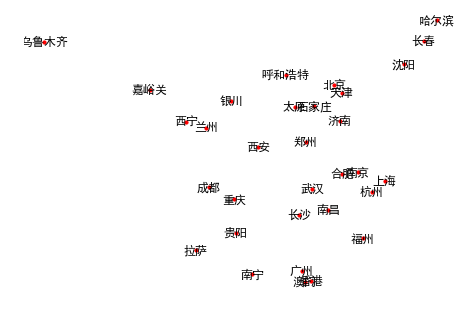

In [426]:
nx.draw(city_graph, city_location, with_labels=True, node_size=10)

## Define a distance that two city could be connected.

In [427]:
from collections import defaultdict

In [428]:
distance = 300
cities_connection = defaultdict(list)
# cities_connection

In [429]:
for c1 in cities:
    for c2 in cities:
        if c1 == c2: continue
            
        if get_city_distance(c1, c2) < distance:
            cities_connection[c1].append(c2)

In [430]:
cities_connection['武汉']

['郑州', '南昌', '长沙']

## print the line between the connected city

C:\Users\jack\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


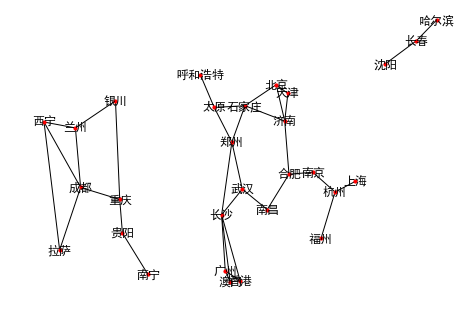

In [431]:
cities_connection_graph = nx.Graph(cities_connection)
nx.draw(cities_connection_graph, city_location, with_labels=True, node_size=10)

In [448]:
def search(start, destination, connection_graph, sort_candidate):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
#         print(path)
        
        if froninter in visitied: continue
            
        successors = connection_graph[froninter]
        
        for city in successors:
            if city in path: continue
                
            new_path = path + [city]
#             new_path = [city] + path
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes)

In [453]:
#路径最短优先
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i in range(1, len(path)):
            distance += get_city_distance(path[i-1], path[-1])
            
        return distance
    
    return sorted(pathes, key=get_path_distnace)

In [454]:
search('石家庄','上海',cities_connection, sort_candidate=shortest_path_first)

['石家庄', '济南', '合肥', '南京', '杭州', '上海']

In [455]:
#换乘最少优先
def transfer_stations_first(pathes):
    return sorted(pathes, key=len)

In [456]:
search('石家庄','上海',cities_connection, sort_candidate=transfer_stations_first)

['石家庄', '济南', '合肥', '南京', '杭州', '上海']

In [457]:
#换乘最多优先
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [458]:
search('石家庄','上海',cities_connection, sort_candidate=transfer_as_much_possible)

['石家庄', '郑州', '武汉', '南昌', '合肥', '南京', '杭州', '上海']

In [460]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [462]:
pretty_print(search('北京', '福州', cities_connection, sort_candidate=shortest_path_first))

北京🚗->济南🚗->合肥🚗->南京🚗->杭州🚗->福州


# Homewrok：北京地铁路线规划

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import requests
from collections import defaultdict

C:\Users\jack\AppData\Roaming\Python\Python36\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [43]:
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
headers ={"User-Agent":"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.1 (KHTML, like Gecko) Chrome/14.0.835.163 Safari/535.1"}

In [44]:
response = requests.get(url,headers = headers)
response.encoding = 'utf_8'
r'<a target=_blank href="(.*?)">(北京地铁.*?)</a></td><td valign="top"'
r'<td width="204" align="center" valign="middle" colspan="1" rowspan="2"><a target=_blank href="/item/((?:[a-zA-Z]|[0-9]|(?:%[0-9a-fA-F][0-9a-fA-F]))+(?:/\d+)*)"'
 r'<td width="204" align="center" valign="middle" colspan="1" rowspan="2"><a target=_blank href="/item/(?:[a-zA-Z]|[0-9]|(?:%[0-9a-fA-F][0-9a-fA-F]))+(?:/\d+)*">北京地铁([\u4e00-\u9fa5_a-zA-Z0-9]+)'

In [193]:
need_url = r'<a target=_blank href="(.*?)">北京地铁.*?</a></td><td valign="top"'
need_title = r'<a target=_blank href=".*?">北京地铁(.*?)</a></td><td valign="top"'
pattern_url = re.compile(need_url)
pattern_title = re.compile(need_title)
need = pattern_url.findall(response.text)
need2 = pattern_title.findall(response.text)

In [203]:
baidu_url = 'https://baike.baidu.com'

In [204]:
underground_url = defaultdict()
for i,j in zip(need,need2):
    underground_url[j] = baidu_url + i

In [205]:
underground_url # 缺八通线，西郊线， s1线

defaultdict(None,
            {'1号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
             '2号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF',
             '4号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
             '5号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
             '6号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF',
             '7号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF',
             '8号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF',
             '9号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF',
             '10号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
        

## 市区地铁线的爬取

In [513]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<td align="center" valign="middle" colspan="1" rowspan="1">([\u4E00-\u9FA5]+)</td>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [514]:
first = get_station_distance('1号线')

In [515]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<tr><th>(.*?)</th><td width="72" align="middle" valign="center">'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [516]:
second = get_station_distance('2号线')


In [517]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<td align="center" valign="middle" colspan="1" rowspan="1">([\u4E00-\u9FA5]+)</td>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [518]:
fourth = get_station_distance('4号线')[1:]

In [519]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<th align="center" valign="middle">([\u4E00-\u9FA5]+)</th>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [520]:
fifth = get_station_distance('5号线')[4:]

In [521]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<tr><th>([\u4E00-\u9FA5]+)</th>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [522]:
sixth = get_station_distance('6号线')[1:]

In [523]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<tr><th>([\u4E00-\u9FA5]+)</th>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [524]:
seventh = get_station_distance('7号线')[2:]

In [525]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<tr><th width="\d+">([\u4E00-\u9FA5]+)</th>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [526]:
#8号线分为南北两端
eighth_south = get_station_distance('8号线')[1:20]
eighth_north =  get_station_distance('8号线')[20:]

In [527]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<tr><th>([\u4E00-\u9FA5]+)</th>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [528]:
ninth = get_station_distance('9号线')

In [529]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<tr><td width="57" align="middle" valign="center">(\w+)</td>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [530]:
tenth = get_station_distance('10号线')

In [531]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<tr><th align="center" valign="middle">(\w+)</th>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [532]:
thirteenth = get_station_distance('13号线')[1:]

In [533]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<tr><th align="center" valign="middle">(\w+)</th>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [534]:
#14号线分为南北段
fourteenth_west = get_station_distance('14号线')[3:]
fourteenth_east = get_station_distance('14号线')[11:]

In [535]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<tr><th align="center" valign="middle">(\w+)</th>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station


In [536]:
fifteenth = get_station_distance('15号线')[3:]

In [537]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<td width="131" align="center" valign="middle">(\w+)</td>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [538]:
sixteenth = get_station_distance('16号线')

### 郊区地铁线爬取

In [539]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<th width="98">(\w+)站?</th>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [540]:
changpin = get_station_distance('昌平线')[1:]
changpin

['昌平西山口', '十三陵景区', '昌平', '昌平东关', '北邵洼', '南邵', '沙河高教园', '沙河', '巩华城']

In [541]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<th align="center" valign="middle">(\w+)站?</th>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [542]:
fangshan = get_station_distance('房山线')[3:]
fangshan

['郭公庄',
 '大葆台',
 '稻田',
 '长阳',
 '篱笆房',
 '广阳城',
 '良乡大学城北',
 '良乡大学城',
 '良乡大学城西',
 '良乡南关',
 '苏庄']

In [543]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'(\w+)站</a>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [544]:
yizhuang = get_station_distance('亦庄线')[5:]
yizhuang

['宋家庄',
 '肖村',
 '小红门',
 '旧宫',
 '亦庄桥',
 '亦庄文化园',
 '万源街',
 '荣京东街',
 '荣昌东街',
 '同济南路',
 '经海路',
 '次渠南',
 '次渠',
 '亦庄火车']

In [545]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<th width="184">(\w+)站?</th>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [546]:
yanfang = get_station_distance('燕房线')[1:]
yanfang

['燕山', '房山城关', '饶乐府', '马各庄', '大石河东', '星城', '阎村']

In [547]:
def get_station_distance(i):
    
    url = underground_url[i]
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<th align="center" valign="middle">(\w+)站?</th>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [548]:
jichang = get_station_distance('机场线')[2:]
jichang

['东直门站', '三元桥', '3号航站楼', '2号航站楼']

In [549]:
#手动补充八通，S1，西郊线
def get_station_distance(url):
    
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<tr><th align="center" valign="middle">(\w+)</th>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [550]:
url = 'https://baike.baidu.com/item/北京地铁八通线/4561974?fromtitle=八通线&fromid=5461430&fr=aladdin'
batong = get_station_distance(url)[2:]
batong

['四惠',
 '四惠东',
 '高碑店',
 '传媒大学',
 '双桥',
 '管庄',
 '八里桥',
 '通州北苑',
 '果园',
 '九棵树',
 '梨园',
 '临河里',
 '土桥']

In [551]:
def get_station_distance(url):
    
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<td width="14" valign="top">(\w+)站</td>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [552]:
url = 'https://baike.baidu.com/item/北京现代有轨电车西郊线'
xijiao = get_station_distance(url)
xijiao

['巴沟', '茶棚', '万安', '植物园', '香山']

In [553]:
def get_station_distance(url):
    
    response = requests.get(url, headers = headers)
    response.encoding = 'utf_8'
    
    need_station = r'<td width="37" valign="top">(\w+)站</td>'
    pattern_station = re.compile(need_station)
    
    station = pattern_station.findall(response.text)
    
    return station

In [554]:
url = 'https://baike.baidu.com/item/北京地铁S1线/9165132'
S1 = get_station_distance(url)
S1

['苹果园', '金安桥', '四道桥', '上岸', '小园', '石厂']

In [555]:
from collections import defaultdict
subway_location = defaultdict(list)
station_list = [first, second, fourth, fifth, sixth, seventh, eighth_south, eighth_north, ninth, tenth, thirteenth, fourteenth_west, fourteenth_east, fifteenth, sixteenth, fangshan, yizhuang, yanfang, jichang, batong, xijiao, S1]
line_list = ['1号线',  '2号线', '4号线', '5号线', '6号线', '7号线', '8号线南段', '8号线北段', '9号线', '10号线', '13号线', '14号线西段', '14号线东段', '15号线', '16号线', '房山线', '亦庄线', '燕房线', '机场线', '八通线', '西郊线', 'S1线']

In [556]:
for i,j in zip(line_list, station_list):
    subway_location[i] = j

In [557]:
#查看路线
for line, station in subway_location.items():
    print(station)

['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东']
['西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄']
['安河桥北', '北宫门', '西苑', '圆明园', '北京大学东门', '中关村', '海淀黄庄', '人民大学', '魏公村', '国家图书馆', '动物园', '西直门', '新街口', '平安里', '西四', '灵境胡同', '西单', '宣武门', '菜市口', '陶然亭', '北京南站', '马家堡', '角门西', '公益西桥']
['宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '崇文门', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北']
['金安桥', '苹果园', '杨庄', '西黄村', '廖公庄', '田村', '海淀五路居', '慈寿寺', '花园桥', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台路', '十里堡', '青年路', '褡裢坡', '黄渠', '常营', '草房', '物资学院路', '通州北关', '通运门', '北运河西', '北运河东', '郝家府', '东夏园', '潞城']
['北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口', '广渠门内', '广渠门外', '双井', '九龙山', '大郊亭', '百子湾', '化工', 

## 构建站与站的联系

In [558]:
station_connection = defaultdict(list)

In [559]:
for line, station in subway_location.items():
    for i, site in enumerate(station):
        if i == 0:
            if station[i+1] not in station_connection[site]:
                station_connection[site].append(station[i+1])
        elif i == len(station) - 1:
            if station[i-1] not in station_connection[site]:
                station_connection[site].append(station[i-1])
        else:
            if station[i-1] not in station_connection[site]:
                station_connection[site].append(station[i-1])
            
            if station[i+1] not in station_connection[site]:
                station_connection[site].append(station[i+1])
            
                

In [560]:
station_connection

defaultdict(list,
            {'苹果园': ['古城', '金安桥', '杨庄'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
             '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '崇文门', '灯市口'],
             '建国门': ['东单', '永安里', '朝阳门', '北京站'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '大望路': ['国贸', '四惠', '九龙山', '金台路'],
             '四惠': ['大望路', '四惠东'],
             '四惠东': ['四惠', '高碑店'],
             '西直门': ['积水潭',

In [561]:
def search(start, destination, connection_graph, sort_candidate):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
#         print(path)
        
        if froninter in visitied: continue
            
        successors = connection_graph[froninter]
        
        for city in successors:
            if city in path: continue
                
            new_path = path + [city]
#             new_path = [city] + path
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes)

In [562]:
'- ->'.join(search('望京南','白堆子',station_connection, sort_candidate = lambda x: x))

'望京南- ->将台- ->东风北桥- ->枣营- ->金台路- ->呼家楼- ->东大桥- ->朝阳门- ->东四- ->南锣鼓巷- ->北海北- ->平安里- ->车公庄- ->车公庄西- ->白石桥南- ->白堆子'

In [563]:
'->'.join(search('万寿路', '白石桥南', station_connection, sort_candidate = lambda x: x))

'万寿路->公主坟->军事博物馆->白堆子->白石桥南'

### 编写不同的排序策略

In [564]:
def longest_path_first(pathes):
    return sorted(pathes, key=len ,reverse=True)

In [565]:
'- ->'.join(search('望京南','白堆子',station_connection, sort_candidate = longest_path_first))

'望京南- ->将台- ->东风北桥- ->枣营- ->金台路- ->呼家楼- ->东大桥- ->朝阳门- ->东四十条- ->东直门- ->雍和宫- ->安定门- ->鼓楼大街- ->积水潭- ->西直门- ->动物园- ->国家图书馆- ->白石桥南- ->白堆子'

In [566]:
def transfer_stations_first(pathes):
    return sorted(pathes, key=len)

In [567]:
'- ->'.join(search('望京南','白堆子',station_connection, sort_candidate = transfer_stations_first))

'望京南- ->将台- ->东风北桥- ->枣营- ->金台路- ->呼家楼- ->东大桥- ->朝阳门- ->东四- ->南锣鼓巷- ->北海北- ->平安里- ->车公庄- ->车公庄西- ->白石桥南- ->白堆子'

# 代码复现：利用房子面积预测波士顿房价

In [481]:
from sklearn.datasets import load_boston
dataset = load_boston()
X, y = dataset['data'], dataset['target']

price = y
room_num = X[:, 5]

In [482]:
import random
import numpy as np

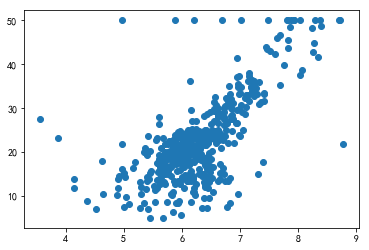

In [483]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

draw_rm_and_price()

## 第二种方法：监督但不使用导数，L2范数损失作为损失函数

loop == 10000
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 458.59962148064534
loop == 9999
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 313.5425963403312
loop == 9998
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 204.7529368815692
loop == 9997
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 133.11437772429755
loop == 9996
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 94.94328390262183
loop == 9995
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 76.16626041878537
loop == 9994
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 68.97494581125231
loop == 9993
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 66.87748161878791
loop == 9992
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 66.33030085853326
loop == 9991
f(age) = -1.1274426275889304 * age + 6.344192905

loop == 9853
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 65.46835983931473
loop == 9852
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 65.46142071157368
loop == 9851
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 65.4544839768583
loop == 9850
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 65.44754963516867
loop == 9849
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 65.44061768650475
loop == 9848
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 65.43368813086654
loop == 9847
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 65.42676096825404
loop == 9846
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 65.41983619866727
loop == 9845
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 65.45081719473939
loop == 9844
f(age) = -1.1274426275889304 * age + 6.3441929054885

loop == 9706
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 64.74215024398258
loop == 9705
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 64.70515248761284
loop == 9704
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 64.73724568379362
loop == 9703
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 64.70018941262617
loop == 9702
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 64.69751074344533
loop == 9701
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 64.69483430598655
loop == 9700
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 64.69216010024988
loop == 9699
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 64.68948812623528
loop == 9698
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 64.68681838394275
loop == 9697
f(age) = -1.1274426275889304 * age + 6.344192905488

f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.895117341775645
loop == 9546
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.89664679372033
loop == 9545
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.89819353769482
loop == 9544
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.89975757369912
loop == 9543
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.901338901733226
loop == 9542
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.902937521797135
loop == 9541
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.90455343389087
loop == 9540
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.906186638014404
loop == 9539
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.84122696524605
loop == 9538
f(age) = -1.1274426275889304 * age + 6.344192905488583, with

loop == 9358
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.04617916154506
loop == 9357
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 62.98753806157437
loop == 9356
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.060178138904995
loop == 9355
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.000968600117474
loop == 9354
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.074413901128
loop == 9353
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.01463592352368
loop == 9352
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 62.98870280181037
loop == 9351
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.06218116512663
loop == 9350
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 63.00238245533361
loop == 9349
f(age) = -1.1274426275889304 * age + 6.344192905488

loop == 9250
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 62.54226694920732
loop == 9249
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 62.55030573219871
loop == 9248
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 62.525623837958534
loop == 9247
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 62.53361691096778
loop == 9246
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 62.54168217314034
loop == 9245
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 62.51696066535562
loop == 9244
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 62.52498021754604
loop == 9243
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 62.50033699536221
loop == 9242
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 62.508310837570484
loop == 9241
f(age) = -1.1274426275889304 * age + 6.3441929054

f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.80096167580972
loop == 9091
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.813509019671486
loop == 9090
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.826197007531235
loop == 9089
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.839025639388964
loop == 9088
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.78688067406224
loop == 9087
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.79945216049123
loop == 9086
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.812164290918204
loop == 9085
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.792842282505475
loop == 9084
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.805569894002176
loop == 9083
f(age) = -1.1274426275889304 * age + 6.344192905488583, wi

loop == 8938
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.161647953437296
loop == 8937
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.174255916240966
loop == 8936
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.1551705472745
loop == 8935
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.13619838065411
loop == 8934
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.148696661599274
loop == 8933
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.129712534396745
loop == 8932
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.142226296411636
loop == 8931
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.12323020862695
loop == 8930
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 61.13575945171158
loop == 8929
f(age) = -1.1274426275889304 * age + 6.34419290

loop == 8824
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 60.66961338923764
loop == 8823
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 60.682040545311054
loop == 8822
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 60.663226884259046
loop == 8821
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 60.64452642555312
loop == 8820
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 60.65684389976803
loop == 8819
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 60.63813148047994
loop == 8818
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 60.65046443576458
loop == 8817
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 60.631740055894355
loop == 8816
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 60.644088492248706
loop == 8815
f(age) = -1.1274426275889304 * age + 6.34419290

loop == 8639
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.801099412583696
loop == 8638
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.81245547923806
loop == 8637
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.7970017149864
loop == 8636
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.80839342856216
loop == 8635
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.79291459183639
loop == 8634
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.7775156797131
loop == 8633
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.78883804313365
loop == 8632
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.77341405853627
loop == 8631
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.784772068878205
loop == 8630
f(age) = -1.1274426275889304 * age + 6.344192905488

loop == 8507
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.28647892599108
loop == 8506
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.24423917203915
loop == 8505
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.229234532403
loop == 8504
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.273117380726845
loop == 8503
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.23092243005745
loop == 8502
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.246663920488565
loop == 8501
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.2315358769947
loop == 8500
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.21648775810333
loop == 8499
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 59.23219475665169
loop == 8498
f(age) = -1.1274426275889304 * age + 6.3441929054885

loop == 8343
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 58.57417940347084
loop == 8342
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 58.592743867188744
loop == 8341
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 58.556418626597036
loop == 8340
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 58.600689941795345
loop == 8339
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 58.5640318012719
loop == 8338
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 58.5555475308541
loop == 8337
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 58.54707930942171
loop == 8336
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 58.56557324207638
loop == 8335
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 58.52935882843198
loop == 8334
f(age) = -1.1274426275889304 * age + 6.34419290548

loop == 8179
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.96625593926025
loop == 8178
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.957887904014804
loop == 8177
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.949535917754766
loop == 8176
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.94119998048017
loop == 8175
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.96359187115503
loop == 8174
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.927738958919484
loop == 8173
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.97923887593641
loop == 8172
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.94288662769831
loop == 8171
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.934515814253395
loop == 8170
f(age) = -1.1274426275889304 * age + 6.34419290

loop == 8057
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.525813821381384
loop == 8056
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.5513820432424
loop == 8055
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.52025609468041
loop == 8054
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.54585403790786
loop == 8053
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.514701662673374
loop == 8052
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.540329327267244
loop == 8051
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.509150525360255
loop == 8050
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.534807911320556
loop == 8049
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 57.50360268274107
loop == 8048
f(age) = -1.1274426275889304 * age + 6.34419290

f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.9610179565241
loop == 7886
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.846207908745015
loop == 7885
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.93110675766551
loop == 7884
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.89443696359918
loop == 7883
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.93421301555589
loop == 7882
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.89731402556172
loop == 7881
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.93738548747997
loop == 7880
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.82291991723316
loop == 7879
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.90754868681819
loop == 7878
f(age) = -1.1274426275889304 * age + 6.344192905488583, with err

loop == 7745
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.40461129783469
loop == 7744
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.39579288368676
loop == 7743
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.3870011584657
loop == 7742
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.401940231783904
loop == 7741
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.39309202123686
loop == 7740
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.38427049961671
loop == 7739
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.375475666923464
loop == 7738
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.39043136869293
loop == 7737
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 56.38158005067368
loop == 7736
f(age) = -1.1274426275889304 * age + 6.34419290548

loop == 7594
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.89819367592198
loop == 7593
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.91518779726987
loop == 7592
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.90651352147484
loop == 7591
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.89786593460671
loop == 7590
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.889245036665486
loop == 7589
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.90629762829921
loop == 7588
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.89760916813056
loop == 7587
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.88894739688882
loop == 7586
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.88031231457397
loop == 7585
f(age) = -1.1274426275889304 * age + 6.34419290548

loop == 7409
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.316237906908974
loop == 7408
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.31275069060648
loop == 7407
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.309264132670684
loop == 7406
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.30577823310158
loop == 7405
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.302292991899165
loop == 7404
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.32206760075857
loop == 7403
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.29284821278273
loop == 7402
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.312551532827
loop == 7401
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 55.283416365476754
loop == 7400
f(age) = -1.1274426275889304 * age + 6.3441929054

loop == 7268
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.879032729359245
loop == 7267
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.83347046070714
loop == 7266
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.87516473771518
loop == 7265
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.82952639661714
loop == 7264
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.871301550613836
loop == 7263
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.82558713706984
loop == 7262
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.86744316805518
loop == 7261
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.821652682065235
loop == 7260
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.86358959003921
loop == 7259
f(age) = -1.1274426275889304 * age + 6.344192905

loop == 7095
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.3594546038307
loop == 7094
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.33740579929473
loop == 7093
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.33982481952512
loop == 7092
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.34227207939316
loop == 7091
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.344747578898804
loop == 7090
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.3227731482075
loop == 7089
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.32517397208737
loop == 7088
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.32760303560486
loop == 7087
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 54.33006033875997
loop == 7086
f(age) = -1.1274426275889304 * age + 6.3441929054885

loop == 6917
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.82894791680709
loop == 6916
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.85371998618745
loop == 6915
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.857968774673864
loop == 6914
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.84077772143987
loop == 6913
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.844971589681066
loop == 6912
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.84921577644715
loop == 6911
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.8320378190332
loop == 6910
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.83622708555406
loop == 6909
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.840466670599824
loop == 6908
f(age) = -1.1274426275889304 * age + 6.3441929054

loop == 6789
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.484572115815276
loop == 6788
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.46872224283334
loop == 6787
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.47265810260174
loop == 6786
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.47664428089503
loop == 6785
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.460797121769005
loop == 6784
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.46473325058434
loop == 6783
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.4687196979246
loop == 6782
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.452875252654465
loop == 6781
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 53.45681165051676
loop == 6780
f(age) = -1.1274426275889304 * age + 6.3441929054

f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.939086360690276
loop == 6595
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.94906745315992
loop == 6594
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.95924955724612
loop == 6593
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.929021339224775
loop == 6592
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.938959846165524
loop == 6591
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.949099364722805
loop == 6590
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.939646130089116
loop == 6589
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.949875901698924
loop == 6588
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.91954743443537
loop == 6587
f(age) = -1.1274426275889304 * age + 6.344192905488583, wi

loop == 6435
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.52814220416869
loop == 6434
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.52496348808977
loop == 6433
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.521786120785706
loop == 6432
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.5186101022565
loop == 6431
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.51543543250214
loop == 6430
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.512262111522645
loop == 6429
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.509090139318
loop == 6428
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.5059195158882
loop == 6427
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.50275024123328
loop == 6426
f(age) = -1.1274426275889304 * age + 6.34419290548858

loop == 6297
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.172297989008165
loop == 6296
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.18844334782508
loop == 6295
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.171168566669756
loop == 6294
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.170468121830226
loop == 6293
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.16977175369678
loop == 6292
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.169079462269444
loop == 6291
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.15204659658151
loop == 6290
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.16799573303607
loop == 6289
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 52.150884243217924
loop == 6288
f(age) = -1.1274426275889304 * age + 6.3441929

loop == 6122
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.741461225639625
loop == 6121
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.75855409943384
loop == 6120
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.72725837254957
loop == 6119
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.744000582991376
loop == 6118
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.74454878942458
loop == 6117
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.745110587224225
loop == 6116
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.72904414860698
loop == 6115
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.72955167006489
loop == 6114
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.73007278288924
loop == 6113
f(age) = -1.1274426275889304 * age + 6.344192905

loop == 5995
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.446176318601026
loop == 5994
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.44764812514436
loop == 5993
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.44914629421221
loop == 5992
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.43501331721512
loop == 5991
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.43645089032582
loop == 5990
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.43791482596101
loop == 5989
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.439405124120725
loop == 5988
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.42530364301219
loop == 5987
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.426733345214735
loop == 5986
f(age) = -1.1274426275889304 * age + 6.344192905

loop == 5847
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.13332445336895
loop == 5846
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.135940194757374
loop == 5845
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.121984705005865
loop == 5844
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.12453149675823
loop == 5843
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.12712318240635
loop == 5842
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.12975976195026
loop == 5841
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.115755112936775
loop == 5840
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.1183227428446
loop == 5839
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 51.1209352666482
loop == 5838
f(age) = -1.1274426275889304 * age + 6.34419290548

loop == 5655
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.73030655254718
loop == 5654
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.704237474425085
loop == 5653
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.73678534120691
loop == 5652
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.69574745436142
loop == 5651
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.72793004263107
loop == 5650
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.68730844241637
loop == 5649
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.719125752173824
loop == 5648
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.67892043858994
loop == 5647
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.71037246983523
loop == 5646
f(age) = -1.1274426275889304 * age + 6.3441929054

loop == 5521
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.43587217139938
loop == 5520
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.427496981319706
loop == 5519
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.4329738328836
loop == 5518
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.424583905131584
loop == 5517
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.41630158191884
loop == 5516
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.436442638408316
loop == 5515
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.41418604504303
loop == 5514
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.4344252334436
loop == 5513
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.41207931417086
loop == 5512
f(age) = -1.1274426275889304 * age + 6.34419290548

f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.09541751091025
loop == 5347
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.08812414504151
loop == 5346
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.10928456270955
loop == 5345
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.06224234626706
loop == 5344
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.11039777856718
loop == 5343
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.06278618591014
loop == 5342
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.096406003153355
loop == 5341
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.07613573496178
loop == 5340
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 50.097237637447186
loop == 5339
f(age) = -1.1274426275889304 * age + 6.344192905488583, with e

f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.802058253871905
loop == 5175
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.76010078348696
loop == 5174
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.76868368935286
loop == 5173
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.766814117243
loop == 5172
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.76494485671363
loop == 5171
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.763075907764765
loop == 5170
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.76120727039638
loop == 5169
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.75933894460849
loop == 5168
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.7574709304011
loop == 5167
f(age) = -1.1274426275889304 * age + 6.344192905488583, with erro

loop == 5059
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.54637970670553
loop == 5058
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.557371462885044
loop == 5057
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.54412967866835
loop == 5056
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.54295522986588
loop == 5055
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.530137955290705
loop == 5054
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.55218238989537
loop == 5053
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.53888352307657
loop == 5052
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.52602874286402
loop == 5051
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.548153685293386
loop == 5050
f(age) = -1.1274426275889304 * age + 6.344192905

loop == 4900
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.26573941886916
loop == 4899
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.288863186876746
loop == 4898
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.27584214469249
loop == 4897
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.26326518911448
loop == 4896
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.27463369412205
loop == 4895
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.26197565542326
loop == 4894
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.26176016154364
loop == 4893
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.26155243356935
loop == 4892
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 49.26135247150036
loop == 4891
f(age) = -1.1274426275889304 * age + 6.34419290548

loop == 4698
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.920880352663886
loop == 4697
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.944662686331824
loop == 4696
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.92582964514445
loop == 4695
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.91811906019401
loop == 4694
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.930186591599266
loop == 4693
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.9120664443798
loop == 4692
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.93571135759217
loop == 4691
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.91697248871142
loop == 4690
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.909298045850576
loop == 4689
f(age) = -1.1274426275889304 * age + 6.344192905

loop == 4565
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.71779338053286
loop == 4564
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.72107515430026
loop == 4563
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.71440627042726
loop == 4562
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.71767816806054
loop == 4561
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.72106289840073
loop == 4560
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.714282997278204
loop == 4559
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.717657851484276
loop == 4558
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.710889641953216
loop == 4557
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.71425462002517
loop == 4556
f(age) = -1.1274426275889304 * age + 6.344192905

loop == 4349
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.393946869499565
loop == 4348
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.39742881803963
loop == 4347
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.39105612695082
loop == 4346
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.39453753629456
loop == 4345
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.38816625815898
loop == 4344
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.39164712830638
loop == 4343
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.385277263124046
loop == 4342
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.3887575940751
loop == 4341
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.38238914184599
loop == 4340
f(age) = -1.1274426275889304 * age + 6.34419290548

loop == 4112
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.06595581003691
loop == 4111
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.05085141856221
loop == 4110
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.06380449956359
loop == 4109
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.04865509639676
loop == 4108
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.061655920498794
loop == 4107
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.04646150563983
loop == 4106
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.05951007284254
loop == 4105
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.04427064629145
loop == 4104
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 48.05736695659483
loop == 4103
f(age) = -1.1274426275889304 * age + 6.34419290548

loop == 3936
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.810796582231724
loop == 3935
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.814528359271726
loop == 3934
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.81004924674453
loop == 3933
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.81384481403311
loop == 3932
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.80106871281229
loop == 3931
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.813967473868175
loop == 3930
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.80099100933606
loop == 3929
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.81413683907982
loop == 3928
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.80096001123639
loop == 3927
f(age) = -1.1274426275889304 * age + 6.344192905

loop == 3780
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.60608190764577
loop == 3779
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.6025198548902
loop == 3778
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.5989961862792
loop == 3777
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.60401423530483
loop == 3776
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.60042450724476
loop == 3775
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.59687316332929
loop == 3774
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.593360203558404
loop == 3773
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.59835194384388
loop == 3772
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.59477292462391
loop == 3771
f(age) = -1.1274426275889304 * age + 6.3441929054885

loop == 3600
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.387902892984876
loop == 3599
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.38710969556565
loop == 3598
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.386317698864964
loop == 3597
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.3855269028828
loop == 3596
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.384737307619176
loop == 3595
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.383948913074086
loop == 3594
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.383161719247525
loop == 3593
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.38237572613951
loop == 3592
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.381590933750005
loop == 3591
f(age) = -1.1274426275889304 * age + 6.3441929

f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.10181601365465
loop == 3350
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.11236728993719
loop == 3349
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.1057167131619
loop == 3348
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.099276781128815
loop == 3347
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.10988847886211
loop == 3346
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.1032103282392
loop == 3345
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.09674282235852
loop == 3344
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.10741494154258
loop == 3343
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 47.10070921707208
loop == 3342
f(age) = -1.1274426275889304 * age + 6.344192905488583, with erro

loop == 3141
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.88500125081711
loop == 3140
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.87860185827125
loop == 3139
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.88071232412388
loop == 3138
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.882897039667185
loop == 3137
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.876458892923615
loop == 3136
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.878593158687636
loop == 3135
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.872240957216334
loop == 3134
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.874324773201074
loop == 3133
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.8764828388765
loop == 3132
f(age) = -1.1274426275889304 * age + 6.34419290

loop == 3013
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.75003396154528
loop == 3012
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.75222352756423
loop == 3011
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.745834425577925
loop == 3010
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.7479735418176
loop == 3009
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.75018690774797
loop == 3008
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.74375905156395
loop == 3007
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.74592196771502
loop == 3006
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.74815913355679
loop == 3005
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.741692523175054
loop == 3004
f(age) = -1.1274426275889304 * age + 6.34419290548

loop == 2851
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.57463801951679
loop == 2850
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.5765392517285
loop == 2849
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.571353230620495
loop == 2848
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.57322062245915
loop == 2847
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.56808487663872
loop == 2846
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.5699184281043
loop == 2845
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.57182622926057
loop == 2844
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.566632668663985
loop == 2843
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.568506629447185
loop == 2842
f(age) = -1.1274426275889304 * age + 6.34419290548

loop == 2676
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.40104470792566
loop == 2675
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.40350703876048
loop == 2674
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.398484037144534
loop == 2673
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.400925014444795
loop == 2672
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.39592827766955
loop == 2671
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.39834790143526
loop == 2670
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.39337742950071
loop == 2669
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.395775699731864
loop == 2668
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.39083149263803
loop == 2667
f(age) = -1.1274426275889304 * age + 6.344192905

loop == 2472
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.20943331848475
loop == 2471
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.211903216174655
loop == 2470
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.20694503555312
loop == 2469
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.20939357970847
loop == 2468
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.20446166392763
loop == 2467
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.206888854548424
loop == 2466
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.20942679214527
loop == 2465
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.20438904069452
loop == 2464
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.20690562475682
loop == 2463
f(age) = -1.1274426275889304 * age + 6.3441929054

loop == 2352
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.09839484909514
loop == 2351
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.10081728503389
loop == 2350
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.1033504679487
loop == 2349
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.09182164965415
loop == 2348
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.09411014443671
loop == 2347
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.09650938619534
loop == 2346
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.09901937493002
loop == 2345
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.08756790590502
loop == 2344
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 46.08983320650746
loop == 2343
f(age) = -1.1274426275889304 * age + 6.3441929054885

loop == 2132
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.88455759062787
loop == 2131
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.886189022718746
loop == 2130
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.88793120178568
loop == 2129
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.88458976023485
loop == 2128
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.886337086128854
loop == 2127
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.882991356438374
loop == 2126
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.88474382915944
loop == 2125
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.88139381132931
loop == 2124
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.88315143087743
loop == 2123
f(age) = -1.1274426275889304 * age + 6.344192905

loop == 1953
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.72508551038435
loop == 1952
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.72662698914517
loop == 1951
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.724174376417444
loop == 1950
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.725763369840266
loop == 1949
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.72327863088343
loop == 1948
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.72491513896827
loop == 1947
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.714738149650884
loop == 1946
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.71951170585533
loop == 1945
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.72106415109437
loop == 1944
f(age) = -1.1274426275889304 * age + 6.344192905

f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.639725656639044
loop == 1852
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.6376110072872
loop == 1851
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.638746757221625
loop == 1850
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.636599981640686
loop == 1849
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.63778324623712
loop == 1848
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.63560434442709
loop == 1847
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.633496926678525
loop == 1846
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.63462409564638
loop == 1845
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.63248455166874
loop == 1844
f(age) = -1.1274426275889304 * age + 6.344192905488583, with 

loop == 1667
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.486553975203705
loop == 1666
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.48534745362047
loop == 1665
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.48605141842052
loop == 1664
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.48479398837248
loop == 1663
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.48356191127647
loop == 1662
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.48235518713248
loop == 1661
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.4830621897868
loop == 1660
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.48180455717801
loop == 1659
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.48057227752123
loop == 1658
f(age) = -1.1274426275889304 * age + 6.344192905488

loop == 1497
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.36070315586721
loop == 1496
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.35897323524322
loop == 1495
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.35935915710029
loop == 1494
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.35761643621616
loop == 1493
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.35801622199091
loop == 1492
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.35626070084662
loop == 1491
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.356674350539016
loop == 1490
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.3549060291346
loop == 1489
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.354379978664205
loop == 1488
f(age) = -1.1274426275889304 * age + 6.34419290548

f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.26350194590051
loop == 1353
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.262410193439955
loop == 1352
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.26262294886151
loop == 1351
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.26092430793971
loop == 1350
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.26079932151856
loop == 1349
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.25974860082513
loop == 1348
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.25989495049036
loop == 1347
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.25829666393483
loop == 1346
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.25810527175735
loop == 1345
f(age) = -1.1274426275889304 * age + 6.344192905488583, with er

loop == 1159
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.13901984247066
loop == 1158
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.138224264644066
loop == 1157
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.1374575967383
loop == 1156
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.13733442243618
loop == 1155
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.13651163445951
loop == 1154
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.13571775640365
loop == 1153
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.135676596713246
loop == 1152
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.13406276698366
loop == 1151
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.133963870900956
loop == 1150
f(age) = -1.1274426275889304 * age + 6.3441929054

loop == 929
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.00354478966276
loop == 928
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.00215572064093
loop == 927
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.00086200222975
loop == 926
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.00341528198352
loop == 925
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.000066974261465
loop == 924
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.00061419817376
loop == 923
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.99922877384696
loop == 922
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.99793870013083
loop == 921
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 45.000481289071914
loop == 920
f(age) = -1.1274426275889304 * age + 6.344192905488583, wit

loop == 774
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.91795901982365
loop == 773
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.916358142763414
loop == 772
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.91658739982911
loop == 771
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.9150113257017
loop == 770
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.91522257516295
loop == 769
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.91548636469762
loop == 768
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.913864545825206
loop == 767
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.91411032775545
loop == 766
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.91440864975911
loop == 765
f(age) = -1.1274426275889304 * age + 6.344192905488583, with

f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.829454247129306
loop == 604
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.829360597986266
loop == 603
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.8270499448635
loop == 602
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.82690063822799
loop == 601
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.82676631967493
loop == 600
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.826646989204335
loop == 599
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.82654264681622
loop == 598
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.82645329251056
loop == 597
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.82412578310219
loop == 596
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate

loop == 361
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.70878278918507
loop == 360
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.708658276119515
loop == 359
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.70854875113641
loop == 358
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.70845421423578
loop == 357
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.70611318882124
loop == 356
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.705954005123104
loop == 355
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.70580980950743
loop == 354
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.705680601974215
loop == 353
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.705566382523465
loop == 352
f(age) = -1.1274426275889304 * age + 6.344192905488583, w

f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.61067347405486
loop == 143
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.60663259308531
loop == 142
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.609664271641655
loop == 141
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.60708727576525
loop == 140
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.61093000264638
loop == 139
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.60611123597121
loop == 138
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.60989838703271
loop == 137
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.605137287797255
loop == 136
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rate: 44.608868863039106
loop == 135
f(age) = -1.1274426275889304 * age + 6.344192905488583, with error rat

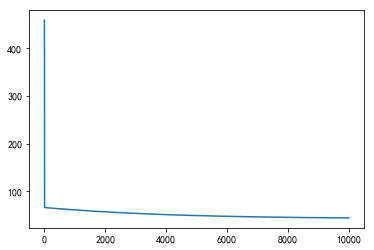

In [484]:
def func(age, k, b): return k * age + b


def loss(y, yhat):
    """
    :param y: the real fares
    :param yhat: the estimated fares
    :return: how good is the estimated fares
    """

    return np.mean(np.square(y - yhat))
    # return np.mean(np.square(y - yhat))
    # return np.mean(np.sqrt(y - yhat))


min_error_rate = float('inf')

loop_times = 10000

losses = []

change_directions = [
    # (k, b)
    (+1, -1), # k increase, b decrease
    (+1, +1),
    (-1, +1),
    (-1, -1)  # k decrease, b decrease
]

k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10

best_k, best_b = k_hat, b_hat

best_direction = None


def step(): return random.random() * 1


direction = random.choice(change_directions)


def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]

    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])


def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])


learing_rate = 1e-1


while loop_times > 0:

    k_delta = -1 * learing_rate * derivate_k(price, func(room_num, k_hat, b_hat), room_num)
    b_delta = -1 * learing_rate * derivate_b(price, func(room_num, k_hat, b_hat))

    # k_delta_direction, b_delta_direction = direction
    #
    # k_delta = k_delta_direction * step()
    # b_delta = b_delta_direction * step()
    #
    # new_k = best_k + k_delta
    # new_b = best_b + b_delta

    k_hat += k_delta
    b_hat += b_delta

    estimated_price = func(room_num, k_hat, b_hat)
    error_rate = loss(y=price, yhat=estimated_price)

    # if error_rate < min_error_rate:
    #     min_error_rate = error_rate
    #     best_k, best_b = new_k, new_b
        # best_k, best_b = k_hat, b_hat

        # direction = (k_delta_direction, b_delta_direction)

        # print(min_error_rate)
    print('loop == {}'.format(loop_times))
        # losses.append(min_error_rate)
    print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, error_rate))
    # else:
    #     direction = random.choice(list(set(change_directions) - {(k_delta_direction, b_delta_direction)}))

    losses.append(error_rate)

    loop_times -= 1


# plt.scatter(sub_age, sub_fare)
# plt.plot(sub_age, func(sub_age, best_k, best_b), c='r')
# plt.plot(sub_age, func(sub_age, k_hat, b_hat), c='r')
# plt.show()

plt.plot(range(len(losses)), losses)
plt.show()

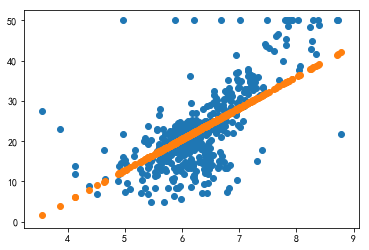

In [488]:
def draw_rm_and_price_and_model():
    plt.scatter(X[:, 5], y)
    plt.scatter(X[:, 5],func(room_num, k_hat, b_hat))

draw_rm_and_price_and_model()

### 导数部分在第三章作业完成